#Import Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from google.colab import files
from google.colab import autoviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML
from sklearn.cluster import KMeans


#Code Menghitung BMI User

In [ ]:
def categorize_bmi():
    kg = float(input('Masukkan Berat Badan Anda (kg): '))
    tinggi = float(input('Masukkan Tinggi Badan Anda (cm): ')) / 100
    bmi = kg / (tinggi ** 2)
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

#test mau ato engga
nilai_bmi = categorize_bmi()
print(nilai_bmi)

KeyboardInterrupt: Interrupted by user

#Dataset

In [ ]:
#url = 'https://docs.google.com/spreadsheets/d/1pMk5X9NjS-m5JWWDjF3G6QT9-LUmcs6Pl-vNfVpWJbc/export?format=csv'
#df = pd.read_csv(url)
#df.head()

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1pMk5X9NjS-m5JWWDjF3G6QT9-LUmcs6Pl-vNfVpWJbc/export?format=csv'
df = pd.read_csv(url)

def make_image_tag(url):
    return f'<img src="{url}" width="200" height="200"/>'
df['Image'] = df['image'].apply(make_image_tag)
df = df.drop(columns=['image'])
df['protein_per_porsi'] = df['protein_per_porsi'].round(2)
HTML(df.to_html(escape=False))

,nama_makanan,kalori,bahan1,jumlah1,bahan2,jumlah2,bahan3,jumlah3,bahan4,jumlah4,bahan5,jumlah5,bahan6,jumlah6,bahan7,jumlah7,bahan8,jumlah8,bahan9,jumlah9,bahan10,jumlah10,bahan11,jumlah11,bahan12,jumlah12,bahan13,jumlah13,bahan14,jumlah14,bahan15,jumlah15,cara_masak,porsi,protein_per_porsi,jenis,Image
0,overnight oat,380.000000,oatmeal,50 gram,susu kedelai,200 ml,strawberry,2 buah,chia seed,secukupnya,granola,secukupnya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1. Tuang oatmeal ke wadah kaca atau kotak makan 2. Disusul dengan menuangkan susu kedelai (aku pakai VSoy) (jangan hanya becek, biarkan agak tenggelam sedikit karena oatmeal dan chia seed akan menyerap susu kedelai) 3. Taburkan chia seed sesuai selera 4. Diamkan dalam wadah tertutup dalam lemari es semalaman (bukan di freezer) 5. Voila! Santap sebagai snack (iris strawberry dan taburkan sedikit granola utk memperkaya rasa dan tekstur - sebelum disantap - supaya strawberry dalam keadaan segar dan granola masih crunchy)",1.0,16.50,pokok,
1,telur super sehat,282.000000,telur,3 butir,wortel,1 buah,daun bawang,3 batang,garam,secukupnya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1. Aduk semua bahan jadi satu. 2. Siapkan wajan anti lengket dan minyak secukupnya. 3. Masukan potongan bawang merah, lalu telur dan sayuran yg sudah jadi satu. 4. Goreng smp kedua sisi matang sesuai selera. 5. Angkat dan tiriskan.",1.0,19.08,lauk,
2,sup rumput laut,130.000000,pasta tauco jepang,1 sdm,kaldu ikan,1 sdt,tofu,1 bungkus,daun bawang,1 batang,rumput laut kering,secukupnya,air,600 ml,garam,secukupnya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1.Siapkan mangkuk, rendam rumput laut kering dengan air panas hingga lunak. 2. Setelah itu, tiriskan dan sisihkan. 3. Siapkan mangkuk, larutkan tauco jepang dengan sedikit air panas. 4. Siapkan panci, rebus air hingga mendidih. 5. Kemudian masukkan tauco Jepang. 6. Aduk-aduk hingga larut. 7. Tambahkan kaldu ikan, aduk-aduk hingga rata sambil koreksi rasanya. 8. Tambahkan garam bila perlu. 9. Masukkan tofu, aduk perlahan supaya tidak hancur. 10. Tambahkan rumput laut dan rebus sebentar. 11. Tuang sup ke dalam mangkuk. 12. Beri irisan daun bawang, lalu sajikan selagi hangat",1.0,10.50,sayuran,
3,sayur bayam kecambah,50.000000,bayam,1/2 ikat,kecambah,secukupnya,bawang merah,2 siung,bawang putih,2 siung,cabai,2 biji,garam,secukupnya,minyak zaitun,1/2 sdt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1. tumis bawang merah, bawang putih, dan cabai hingga harum. 2. Masukkan daun bayam, dan masak hingga layu.3.Tambahkan kecambah dan beri sedikit garam lalu aduk rata.4.Masak sebentar hingga semua bahan tercampur dan kecambah agak layu.5.Sayur bayam dengan kecambah siap disajikan sebagai hidangan sehat dan lezat.",1.0,5.60,sayuran,
4,tumis terung goreng telur,278.000000,terung,1 buah,telur,3 butir,kecap asin,3 sdm,cabai,3 biji,minyak,secukupnya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1. Iris tipis terung, goreng dengan minyak secukupnya hingga kecoklatan. 2. Beri kecap asin 1 sdm.3.Campur telur dan 2 sdm kecap asin. 4.Tumis telur bersama terung dan cabai hingga matang.5.Tumis terung goreng telur siap dihidangkan",1.0,22.90,sayuran,
5,tumis pakcoy,33.000000,pakcoy,2 buah,bawang putih,2 siung,garam,secukupnya,gula,secukupnya,lada bubuk,secukupnya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1.. Tumis bawang putih hingga harum, masukkan pakcoy, aduk hingga agak layu.2. Masukkan garam, gula, kaldu bubuk, dan lada bubuk secukupnya.3. Aduk rata, tes rasa, jika sudah sedap, sajikan",1.0,1.90,sayuran,
6,steak tempe,411.000000,tempe,250 gram,seledri,1 batang,telur,1 butir,tepung terigu,3 sdm,penyedap rasa,secukupnya,mentega,secukupnya,saus lada hitam,secukupnya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1.Kukus tempe sampai melunak, lalu hancurkan. 

In [ ]:
df = df[['nama_makanan','kalori', 'protein_per_porsi', 'jenis']]
print(df)

                      nama_makanan  kalori  protein_per_porsi    jenis
0                    overnight oat     380              16.50    pokok
1                telur super sehat     282              19.08     lauk
2                  sup rumput laut     130              10.50  sayuran
3             sayur bayam kecambah      50               5.60  sayuran
4        tumis terung goreng telur     278              22.90  sayuran
5                     tumis pakcoy      33               1.90  sayuran
6                      steak tempe     411              56.70     lauk
7                 ayam saori tiram     400              94.40     lauk
8                       bihun tahu     210               9.40     lauk
9            kani shirataki mentai     445               6.70    pokok
10                bakso ayam sehat     492              55.30     lauk
11              pedesan suwir ayam     208              40.90     lauk
12                      pepes tahu     216              17.40     lauk
13    

#MinMax

In [ ]:
df_scaled = df.copy()
scaler = MinMaxScaler()

df_scaled[['kalori', 'protein_per_porsi']] = scaler.fit_transform(df_scaled[['kalori', 'protein_per_porsi']])

print(df_scaled)

                      nama_makanan    kalori  protein_per_porsi    jenis
0                    overnight oat  0.490806           0.161464    pokok
1                telur super sehat  0.352192           0.189236     lauk
2                  sup rumput laut  0.137199           0.096878  sayuran
3             sayur bayam kecambah  0.024045           0.044133  sayuran
4        tumis terung goreng telur  0.346535           0.230355  sayuran
5                     tumis pakcoy  0.000000           0.004306  sayuran
6                      steak tempe  0.534653           0.594187     lauk
7                 ayam saori tiram  0.519095           1.000000     lauk
8                       bihun tahu  0.250354           0.085038     lauk
9            kani shirataki mentai  0.582744           0.055974    pokok
10                bakso ayam sehat  0.649222           0.579117     lauk
11              pedesan suwir ayam  0.247525           0.424112     lauk
12                      pepes tahu  0.258840       

#Clustering

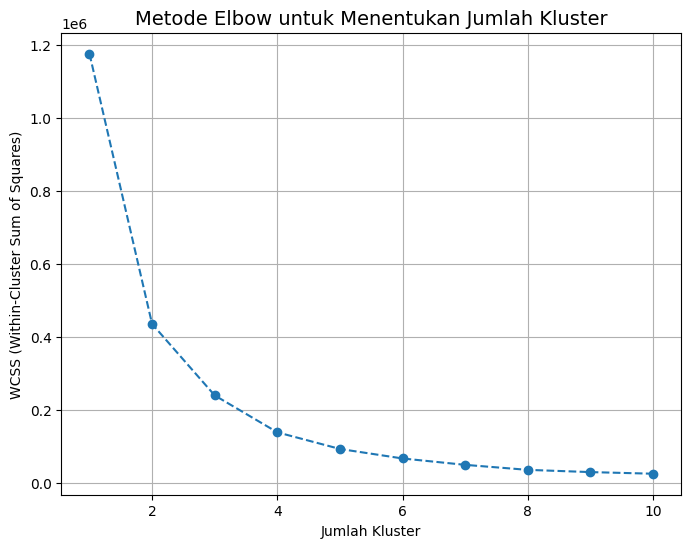

In [ ]:
wcss = []
for k in range(1, 11):  # Menguji kluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[['kalori', 'protein_per_porsi']])  # Melakukan fitting pada kolom yang telah dinormalisasi
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster', fontsize=14)
plt.xlabel('Jumlah Kluster')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

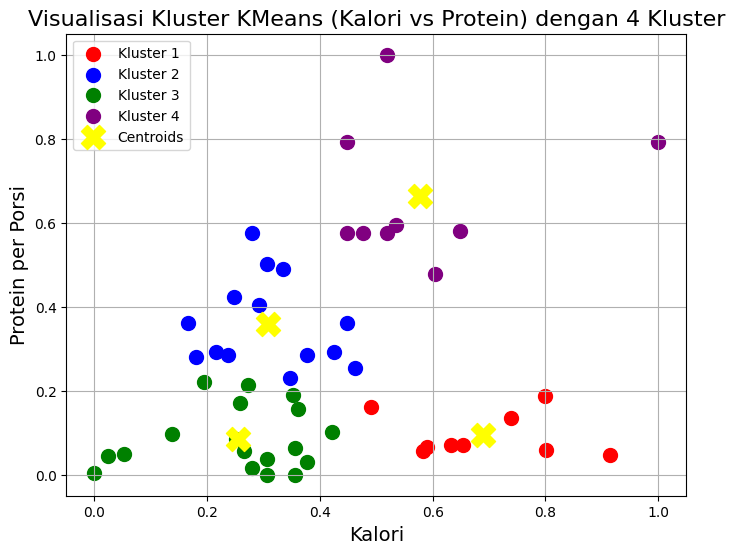

In [ ]:
# Tentukan jumlah kluster
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Melakukan fitting dan prediksi kluster
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[['kalori', 'protein_per_porsi']])

# Membuat plot untuk visualisasi kluster
plt.figure(figsize=(8, 6))

# Visualisasi untuk setiap kluster dengan warna yang berbeda
plt.scatter(df_scaled[df_scaled['Cluster'] == 0]['kalori'], df_scaled[df_scaled['Cluster'] == 0]['protein_per_porsi'], s=100, c='red', label='Kluster 1')
plt.scatter(df_scaled[df_scaled['Cluster'] == 1]['kalori'], df_scaled[df_scaled['Cluster'] == 1]['protein_per_porsi'], s=100, c='blue', label='Kluster 2')
plt.scatter(df_scaled[df_scaled['Cluster'] == 2]['kalori'], df_scaled[df_scaled['Cluster'] == 2]['protein_per_porsi'], s=100, c='green', label='Kluster 3')
plt.scatter(df_scaled[df_scaled['Cluster'] == 3]['kalori'], df_scaled[df_scaled['Cluster'] == 3]['protein_per_porsi'], s=100, c='purple', label='Kluster 4')

# Plot centroid (titik pusat kluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')

# Menambahkan label dan judul
plt.title(f'Visualisasi Kluster KMeans (Kalori vs Protein) dengan {optimal_k} Kluster', fontsize=16)
plt.xlabel('Kalori', fontsize=14)
plt.ylabel('Protein per Porsi', fontsize=14)

# Menambahkan legend untuk kluster dan centroid
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

In [ ]:
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[['kalori', 'protein_per_porsi']])

# Menyusun tabel range untuk masing-masing kluster
cluster_stats = []
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    kalori_min = cluster_data['kalori'].min()
    kalori_max = cluster_data['kalori'].max()
    kalori_mean = cluster_data['kalori'].mean()
    protein_min = cluster_data['protein_per_porsi'].min()
    protein_max = cluster_data['protein_per_porsi'].max()
    protein_mean = cluster_data['protein_per_porsi'].mean()

    cluster_stats.append({
        'Cluster': cluster,
        'Kalori Min': kalori_min,
        'Kalori Max': kalori_max,
        'Protein Min': protein_min,
        'Protein Max': protein_max,
        'Kalori Mean': kalori_mean,
        'Protein Mean': protein_mean
    })

# Mengubah hasil ke dalam DataFrame
range_df = pd.DataFrame(cluster_stats)

# Menampilkan tabel
print("Range Nilai untuk Masing-masing Kluster:")
print(range_df)

Range Nilai untuk Masing-masing Kluster:
   Cluster  Kalori Min  Kalori Max  Protein Min  Protein Max  Kalori Mean  \
0        0         380         680          5.9         19.0   520.333333   
1        1         150         360         22.9         55.0   251.071429   
2        2          33         331          1.5         22.0   212.500000   
3        3         350         740         46.0         94.4   441.444444   

   Protein Mean  
0     10.311111  
1     34.892857  
2      9.420000  
3     63.044444  


In [ ]:
# menampilkan resep per kluster
df['Cluster'] = df_scaled['Cluster']
for i in range(4):  # Jumlah kluster = 4
    print(f"Resep Makanan dari Kluster {i+1}:")
    print(df[df['Cluster'] == i][['nama_makanan', 'kalori', 'protein_per_porsi','jenis']])
    print("\n" + "-"*50 + "\n")

Resep Makanan dari Kluster 1:
               nama_makanan  kalori  protein_per_porsi    jenis
0             overnight oat     380               16.5    pokok
9     kani shirataki mentai     445                6.7    pokok
15     sandwich roti gandum     555               14.0    pokok
16              sayur bakso     495                8.0  sayuran
17  perkedel tahu air fryer     598               19.0     lauk
23             oatmeal buah     450                7.7    pokok
25             nugget tempe     600                7.0     lauk
27           pancake pisang     680                5.9    pokok
30               ayam sauté     480                8.0     lauk

--------------------------------------------------

Resep Makanan dari Kluster 2:
                      nama_makanan  kalori  protein_per_porsi    jenis
4        tumis terung goreng telur     278              22.90  sayuran
11              pedesan suwir ayam     208              40.90     lauk
20          simple grilled chicken

#Penggabungan Cluster dengan BMI

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Kode untuk clustering makanan
# Diasumsikan df sudah berisi data makanan dengan kolom 'kalori' dan 'protein_per_porsi'
optimal_clusters = 4  # Sesuaikan jumlah kluster optimal sesuai dengan analisis Elbow
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['kalori', 'protein_per_porsi']])

# Tentukan cluster yang sesuai dengan setiap kategori BMI berdasarkan mean kalori dan protein
cluster_recommendations = {
    'Underweight': pd.concat([df[df['Cluster'] == 0], df[df['Cluster'] == 3]]),  # Misalnya, cluster 0 untuk makanan tinggi kalori
    'Normal weight': df[df['Cluster'] == 0],  # Misalnya, cluster 1 untuk makanan seimbang
    'Overweight': df[df['Cluster'] == 1],  # Misalnya, cluster 2 untuk makanan rendah kalori
    'Obesity': df[df['Cluster'] == 2]  # Misalnya, cluster 3 untuk makanan sangat rendah kalori
}

# Fungsi untuk mengkategorikan BMI dan merekomendasikan makanan
def categorize_bmi_and_recommend():
    kg = float(input('Masukkan Berat Badan Anda (kg): '))
    tinggi = float(input('Masukkan Tinggi Badan Anda (cm): ')) / 100  # Ubah tinggi ke meter
    bmi = kg / (tinggi ** 2)
    print(f"Nilai BMI Anda: {bmi:.2f}")

    if bmi < 18.5:
        bmi_category = 'Underweight'
    elif 18.5 <= bmi < 25:
        bmi_category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        bmi_category = 'Overweight'
    else:
        bmi_category = 'Obesity'

    recommended_food = cluster_recommendations[bmi_category]

    print(f"Kategori BMI Anda: {bmi_category}")
    print("Rekomendasi Makanan:")
    print(recommended_food[['nama_makanan', 'kalori', 'protein_per_porsi']])  # Tampilkan data makanan sesuai dengan kluster

# Test
categorize_bmi_and_recommend()


Masukkan Berat Badan Anda (kg): 50
Masukkan Tinggi Badan Anda (cm): 169
Nilai BMI Anda: 17.51
Kategori BMI Anda: Underweight
Rekomendasi Makanan:
                   nama_makanan  kalori  protein_per_porsi
0                 overnight oat     380              16.50
6                   steak tempe     411              56.70
7              ayam saori tiram     400              94.40
9         kani shirataki mentai     445               6.70
10             bakso ayam sehat     492              55.30
14         nasi ayam lada hitam     460              46.00
16                  sayur bakso     495               8.00
18  oatmeal dengan susu kedelai     331              11.00
20       simple grilled chicken     334              28.75
21           sup ayam dan jamur     350              75.00
23                 oatmeal buah     450               7.70
30                   ayam sauté     480               8.00
40              dada ayam wijen     350              55.00
42           ayam panggang j